In [109]:
%matplotlib inline
from IPython.core.pylabtools import figsize
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
import pymc as pm

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


# Попробуем сделать линейную регрессию

Возьмем данные из Бишопа

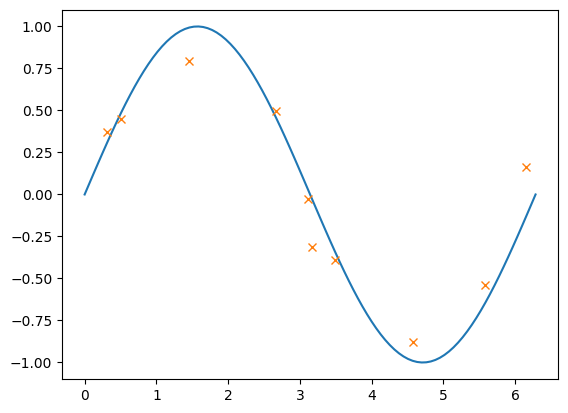

In [103]:
x = np.linspace(0,2*np.pi,100)
y = np.sin(x)

x_ = random.sample(set(x), 10)
y_ = np.sin(x_) + np.random.normal(0, 0.3, 10)

plt.plot(x,y,"-");
plt.plot(x_, y_, 'x');

In [110]:
data = pd.DataFrame(dict(x=x_, y=y_))
data

,x,y
0,6.156252,0.165565
1,3.490659,-0.392255
2,5.585054,-0.537630
3,0.507732,0.448095
4,4.569589,-0.878905
5,3.173326,-0.315226
6,2.665594,0.497298
7,0.317333,0.373240
8,1.459730,0.796997
9,3.109859,-0.026428


# Делаем линейную модель

In [1]:
with pm.Model() as model:  # model specifications in PyMC are wrapped in a with-statement
    sigma = pm.Uniform("sigma", 0, 1)
    intercept = pm.Normal("Intercept", 0, sigma=20)
    slope = pm.Normal("slope", 0, sigma=20)

    target = pm.Normal("y", mu=intercept + slope * x, sigma=sigma, observed=y)

    # Inference!
    # draw 3000 posterior samples using NUTS sampling
    idata = pm.sample(3000, return_inferencedata=False)

NameError: name 'pm' is not defined

In [123]:
from scipy.stats.mstats import mquantiles

In [145]:
intercept = idata['Intercept']
slope = idata['slope']
sigma = idata['sigma']

In [150]:
from scipy.stats import norm

In [176]:
ci = norm.interval(
    0.95, 
    loc=intercept.mean() + x * slope.mean(), 
    scale=sigma.mean())

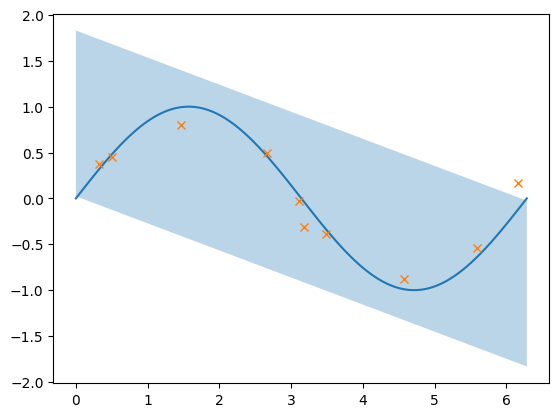

In [180]:
plt.plot(x,y,"-");
plt.plot(x_, y_, 'x');
plt.fill_between(x, *ci, alpha=0.3)

## Сделаем усложнение нашей модели

In [182]:
with pm.Model() as model:  # model specifications in PyMC are wrapped in a with-statement
    sigma = pm.Uniform("sigma", 0, 1)
    intercept = pm.Normal("Intercept", 0, sigma=20)
    slope = pm.Normal("slope", 0, sigma=20)
    slope2 = pm.Normal("slope2", 0, sigma=20)

    target = pm.Normal("y", mu=intercept + slope * x + slope2 * x ** 2, sigma=sigma, observed=y)

    # Inference!
    # draw 3000 posterior samples using NUTS sampling
    idata = pm.sample(3000, return_inferencedata=False)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, Intercept, slope, slope2]


Sampling 4 chains for 1_000 tune and 3_000 draw iterations (4_000 + 12_000 draws total) took 20 seconds.


In [183]:
intercept = idata['Intercept']
slope = idata['slope']
slope2 = idata['slope2']
sigma = idata['sigma']

In [184]:
ci = norm.interval(
    0.95, 
    loc=intercept.mean() + x * slope.mean() + x * x * slope2.mean(), 
    scale=sigma.mean())

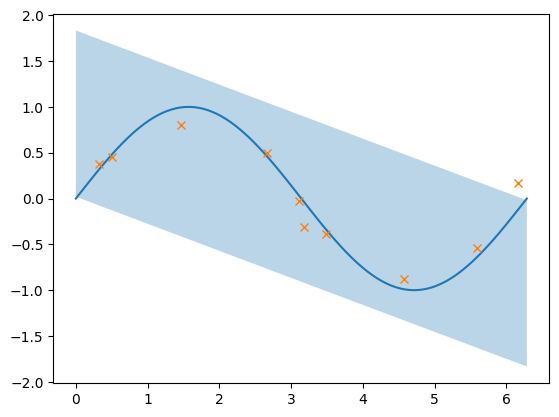

In [186]:
plt.plot(x,y,"-");
plt.plot(x_, y_, 'x');
plt.fill_between(x, *ci, alpha=0.3);

In [193]:
slope2.mean()

-0.8693301957452303

In [189]:
with pm.Model() as model:  # model specifications in PyMC are wrapped in a with-statement
    sigma = pm.Uniform("sigma", 0, 1)
    intercept = pm.Normal("Intercept", 0, sigma=20)
    slope = pm.Normal("slope", 0, sigma=20)
    slope2 = pm.Normal("slope2", 0, sigma=20)
    slope3 = pm.Normal("slope3", 0, sigma=20)

    mu = intercept + slope * x + slope2 * x ** 2 + slope3 * x ** 3
    
    target = pm.Normal("y", mu=mu, sigma=sigma, observed=y)

    # Inference!
    # draw 3000 posterior samples using NUTS sampling
    idata = pm.sample(3000, return_inferencedata=False)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, Intercept, slope, slope2, slope3]


Sampling 4 chains for 1_000 tune and 3_000 draw iterations (4_000 + 12_000 draws total) took 129 seconds.


In [190]:
intercept = idata['Intercept']
slope = idata['slope']
slope2 = idata['slope2']
slope3 = idata['slope3']
sigma = idata['sigma']

In [191]:
ci = norm.interval(
    0.95, 
    loc=intercept.mean() + x * slope.mean() + x ** 2 * slope2.mean() + x ** 3 * slope3.mean(),
    scale=sigma.mean())

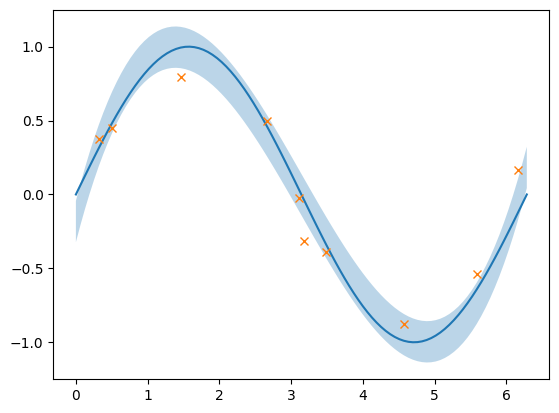

In [192]:
plt.plot(x,y,"-");
plt.plot(x_, y_, 'x');
plt.fill_between(x, *ci, alpha=0.3);

In [210]:
x_poly = np.array([x, x**2, x**3])

In [207]:
with pm.Model() as model:  # model specifications in PyMC are wrapped in a with-statement
    sigma = pm.Uniform("sigma", 0, 1)
    intercept = pm.Normal("Intercept", 0, sigma=20)
    slope = pm.Normal("slope", 0, sigma=20, shape=3)
    
    mu = intercept + slope.dot(x_poly)
    
    target = pm.Normal("y", mu=mu, sigma=sigma, observed=y)

    # Inference!
    # draw 3000 posterior samples using NUTS sampling
    idata = pm.sample(3000, return_inferencedata=False)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, Intercept, slope]


Sampling 4 chains for 1_000 tune and 3_000 draw iterations (4_000 + 12_000 draws total) took 95 seconds.


In [208]:
intercept = idata['Intercept']
slope = idata['slope']
sigma = idata['sigma']

In [212]:
ci = norm.interval(
    0.95, 
    loc=intercept.mean() + slope.mean(axis=0).dot(x_poly),
    scale=sigma.mean())

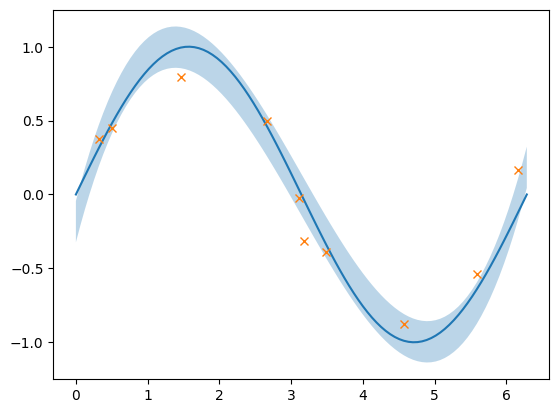

In [213]:
plt.plot(x,y,"-");
plt.plot(x_, y_, 'x');
plt.fill_between(x, *ci, alpha=0.3);

In [226]:
degree = 10
x_poly = np.array(
    [x ** (i+1) for i in range(degree)]
)

In [227]:
with pm.Model() as model:  # model specifications in PyMC are wrapped in a with-statement
    sigma = pm.Uniform("sigma", 0, 1)
    intercept = pm.Normal("Intercept", 0, sigma=20)
    slope = pm.Normal("slope", 0, sigma=20, shape=degree)
    
    mu = intercept + slope.dot(x_poly)
    
    target = pm.Normal("y", mu=mu, sigma=sigma, observed=y)

    # Inference!
    # draw 3000 posterior samples using NUTS sampling
    idata = pm.sample(3000, return_inferencedata=False)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, Intercept, slope]


Sampling 4 chains for 1_000 tune and 3_000 draw iterations (4_000 + 12_000 draws total) took 225 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
There were 6328 divergences after tuning. Increase `target_accept` or reparameterize.
Chain 2 reached the maximum tree depth. Increase `max_treedepth`, increase `target_accept` or reparameterize.


In [228]:
intercept = idata['Intercept']
slope = idata['slope']
sigma = idata['sigma']

In [229]:
ci = norm.interval(
    0.95, 
    loc=intercept.mean() + slope.mean(axis=0).dot(x_poly),
    scale=sigma.mean())

In [230]:
slope

array([[ 0.82182908, -0.96157258, -0.7681976 , ..., -0.0570829 ,
         0.01991107, -0.00150477],
       [ 0.82182908, -0.96157258, -0.7681976 , ..., -0.05708313,
         0.01991112, -0.00150477],
       [ 0.82182908, -0.96157258, -0.7681976 , ..., -0.05708313,
         0.01991112, -0.00150477],
       ...,
       [-0.80561023, -0.46861868,  0.92155884, ...,  0.49368488,
        -0.19502118,  0.01754762],
       [-0.80561023, -0.46861868,  0.92155884, ...,  0.49368488,
        -0.19502118,  0.01754762],
       [-0.80561023, -0.46861868,  0.92155884, ...,  0.49368488,
        -0.19502118,  0.01754762]])

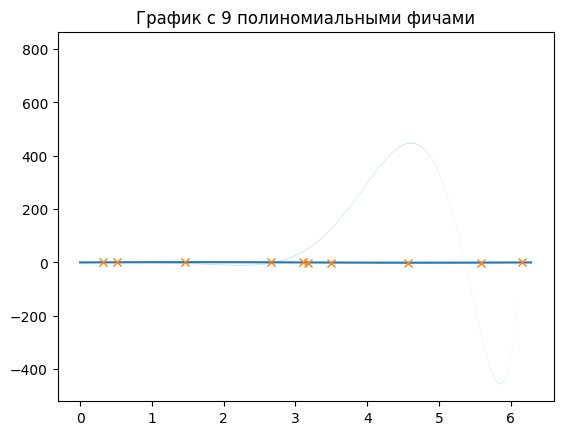

In [231]:
plt.plot(x,y,"-");
plt.plot(x_, y_, 'x');
plt.title("График с 9 полиномиальными фичами")
plt.fill_between(x, *ci, alpha=0.3);

> Метод, который удалили, раньше можно было писать формулы так

```python
formula = "y ~ x1 + x2"
with pm.Model() as model:
	pm.GLM.from_formula(formula, data=my_data)
	print(model)
	trace1 = pm.sample(draws=1000, tune=500, chains=4)

